<a href="https://colab.research.google.com/github/colafishx/190826PyETL/blob/master/simpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train),(x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

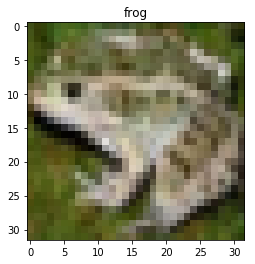

In [0]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,49999)
plt.title(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [17]:
# padding for add 0 to none, activation=relu for transferring layers, softmax for the last layer
# 1792 = 3(filter's width)*3(filter's height)*3(previous pixel's all values) *64(qty of filters) + 64 (bias)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
cnn.add(Conv2D(64,(3,3), 
               padding='same', 
               activation='relu', 
               input_shape=(32,32,3)))
cnn.add(MaxPooling2D())
# 73856 = 3*3*64*128+128
cnn.add(Conv2D(128,(3,3), 
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256,(3,3), 
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add((Dense(10,activation='softmax')))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [0]:
# pre-processing
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [19]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print('original=', y_train[0])
print('processed=', y_train_cat[0])

original= [6]
processed= [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
cnn.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [21]:
# batch_size means how many referrences for adjusting gradient descent
# if rows of data is few (100~200), if many (10~20)
# epochs = how many times the model should review the whole data & decide when to start training
# validation_split to split data into train & test set
# verbose = number of logs (1.detailed, 2.necessary data ONLY, 0.None)
# for the output, val_loss in the most identical standards for judging the model
# adj times = 6W * .09 * epochs / batch_size
# !too many epochs cause over-fitting & decrease the val)loss!
cnn.fit(x_train_norm, y_train_cat,
       batch_size=200,
        epochs=10,
       validation_split=0.1,
       verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 1.5566 - acc: 0.4334 - val_loss: 1.1854 - val_acc: 0.5818
Epoch 2/10
 - 9s - loss: 1.1112 - acc: 0.6052 - val_loss: 0.9981 - val_acc: 0.6592
Epoch 3/10
 - 9s - loss: 0.9037 - acc: 0.6823 - val_loss: 0.8297 - val_acc: 0.7126
Epoch 4/10
 - 9s - loss: 0.7738 - acc: 0.7292 - val_loss: 0.8322 - val_acc: 0.7118
Epoch 5/10
 - 9s - loss: 0.6716 - acc: 0.7660 - val_loss: 0.7053 - val_acc: 0.7536
Epoch 6/10
 - 9s - loss: 0.5759 - acc: 0.7961 - val_loss: 0.6927 - val_acc: 0.7580
Epoch 7/10
 - 9s - loss: 0.4970 - acc: 0.8253 - val_loss: 0.6886 - val_acc: 0.7650
Epoch 8/10
 - 9s - loss: 0.4277 - acc: 0.8527 - val_loss: 0.6921 - val_acc: 0.7732
Epoch 9/10
 - 9s - loss: 0.3527 - acc: 0.8781 - val_loss: 0.7023 - val_acc: 0.7750
Epoch 10/10
 - 9s - loss: 0.2898 - acc: 0.9014 - val_loss: 0.7335 - val_acc: 0.7848


In [22]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 153us/step


[0.770540065908432, 0.7689]

In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = trans
i = [str(b)+'_original' for b in base]
c = [str(b)+'_predict' for b in base]
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
            columns = c,
            index = i)

,airplane_predict,automobile_predict,bird_predict,cat_predict,deer_predict,dog_predict,frog_predict,horse_predict,ship_predict,truck_predict
airplane_original,814,12,30,12,14,7,8,6,56,41
automobile_original,12,870,3,4,2,6,1,1,22,79
bird_original,55,4,702,36,71,40,42,23,17,10
cat_original,23,8,97,547,74,150,42,21,18,20
deer_original,17,3,83,37,761,24,21,40,12,2
dog_original,6,3,63,125,54,687,12,30,7,13
frog_original,6,4,61,42,42,28,795,4,10,8
horse_original,16,3,37,37,59,44,3,784,2,15
ship_original,43,22,10,9,8,8,6,1,872,21
truck_original,30,51,5,13,5,9,3,10,17,857


In [25]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [31]:
np.nonzero(pre != y_test.reshape(-1))

(array([   3,    7,   15, ..., 9989, 9993, 9995]),)

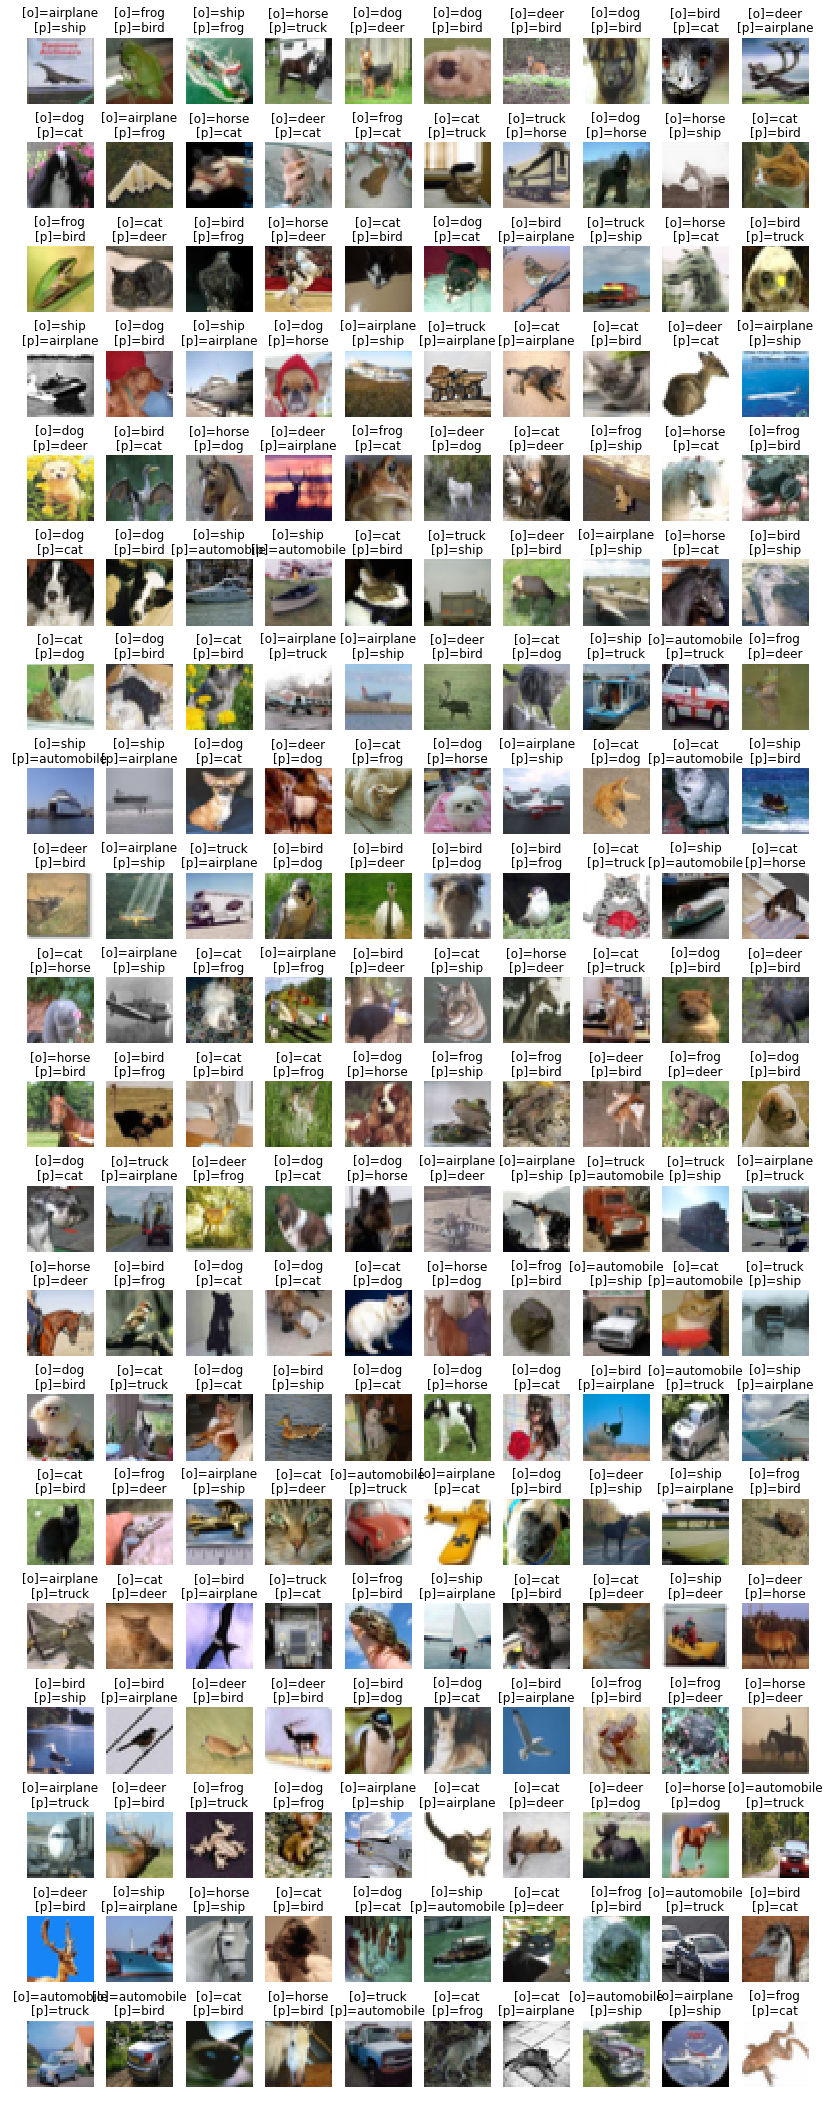

In [32]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(-1))[0][:200]
# wrongly predicted images
false_img = x_test[idx]
# correct answer for the wrongly predicted images
false_answer = y_test.reshape(-1)[idx]
# predict labels for wrongly predicted images
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14,40))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = '[o]=' + trans[false_answer[i]] + "\n[p]=" + trans[false_pre[i]]
    plt.title(t)
    plt.axis('off')
    plt.imshow(img)

In [0]:
cnn.save('cnn.h5')

In [35]:
from keras.models import load_model
# load all pre-trained model data & continue from the previous stage
# to chk the saved file, visit https://support.hdfgroup.org/products/java/release/download.html
loaded = load_model('cnn.h5')
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 183us/step


[0.770540065908432, 0.7689]